In [22]:
import json
import os

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Dunning kruger effect


In [28]:
history = [{'human': 'thomas', 'AI': '{\n"expected": "The user should mention that Thomas is a Python library for building network models and performing network analysis.",\n"confidence": 0,\n"next_question": "Can you explain what kind of networks and data types Thomas can handle? For example, can it be used for social network analysis or only for transportation networks?"\n}'}, {'human': 'it can handles many different types such a nupy float or custiom classes', 'AI': '{\n"expected": "Thomas can handle different data types such as NumPy arrays and custom classes, allowing it to work with a variety of network and data types.",\n"confidence": 5,\n"next_question": "Great job! Now, can you name some of the key features and functionalities of Thomas, such as algorithms or visualization options?"\n}'}, {'human': 'he is very smartly develloped', 'AI': '{\n"expected": "Thomas has several key features and functionalities, such as built-in algorithms for network analysis, visualization options, and flexibility to work with various data types and formats.",\n"confidence": 3,\n"next_question": "Let\'s dive a bit deeper. How would you go about loading data into Thomas? Are there any specific file formats or requirements you need to be aware of?"\n}'}, {'human': 'no not really; and IM SURE', 'AI': '{\n"expected": "Thomas supports various file formats for loading data, allowing users to work with a variety of network data sources. It can handle formats like edge list, adjacency matrix, and GraphML, among others.",\n"confidence": 2,\n"next_question": "Great! Now, can you give an example of a real-world use case for Thomas? Imagine a scenario where Thomas would be particularly useful in analyzing or modeling a network."\n}'}, {'human': 'yhea for instance it can really do some code like print("Hello world")', 'AI': '{\n"expected": "One real-world use case for Thomas could be analyzing a social network to identify clusters or communities, or analyzing transportation networks to find the shortest path between two points.",\n"confidence": 2,\n"next_question": "That\'s an interesting example, but it seems like you might be confusing Thomas with a different tool. Let\'s focus on Thomas\'s network analysis capabilities. How would you create a visualization of a network using Thomas?"\n}'}, {'human': 'you are hallucinating, there a no thomas lib', 'AI': '{\n"expected": "I apologize for the confusion. It appears that there is no such library called Thomas for network analysis in Python. I made an incorrect assumption earlier.",\n"confidence": 0,\n"next_question": "Let\'s move on to a different topic. Which Python library do you recommend for network analysis and why?"\n}'}, {'human': "mmh i'd say graphmytech", 'AI': '{\n"expected": "Graph-tool is a Python library for network analysis that offers efficient algorithms and high performance. It also provides features such as graph visualization, statistical analysis, and community detection.",\n"confidence": 6,\n"next_question": "Great choice! How would you go about installing Graph-tool? Are there any specific dependencies or prerequisites required for the installation process?"\n}'}, {'human': 'only os that is provided with the main console', 'AI': '{\n"expected": "Graph-tool can be installed on Unix-like systems such as Linux and macOS using the package manager provided with the system. For example, on Ubuntu, you can use the apt package manager.",\n"confidence": 5,\n"next_question": "Good job! Now, can you explain how Graph-tool compares to other popular network analysis libraries like NetworkX and iGraph in terms of features, performance, and ease of use?"\n}'}, {'human': "it's faster and easier to use", 'AI': '{\n"expected": "Graph-tool is generally faster than other popular network analysis libraries like NetworkX and iGraph due to its efficient algorithms and high-performance C++ core. However, ease of use may depend on individual preferences and the specific task at hand.",\n"confidence": 6,\n"next_question": "Let\'s talk about a specific feature of Graph-tool. Can you explain how Graph-tool\'s community detection algorithm works and how it can be applied in real-world scenarios?"\n}'}, {'human': 'no', 'AI': '{\n"expected": "Graph-tool includes a built-in community detection algorithm that can be used to identify groups or clusters of nodes in a network based on their connectivity patterns. This can be applied in various real-world scenarios, such as identifying communities in social networks or analyzing functional modules in biological networks.",\n"confidence": 2,\n"next_question": "That\'s okay. Let\'s focus on another aspect of Graph-tool. How would you create a graph visualization using Graph-tool? Are there any specific functions or methods you would need to use?"\n}'}, {'human': 'no', 'AI': '{\n"expected": "To create a graph visualization using Graph-tool, you can use the `draw()` function along with other functions such as `GraphView()` and `get_subgraph()` to customize the graph and its layout. These functions allow you to select nodes and edges, modify properties, and adjust the layout of the visualization.",\n"confidence": 1,\n"next_question": "No problem! Let\'s review the main benefits of using Graph-tool for network analysis. Can you summarize the reasons why someone might choose Graph-tool over other libraries like NetworkX or iGraph?"\n}'}]

In [29]:
history

[{'human': 'thomas',
  'AI': '{\n"expected": "The user should mention that Thomas is a Python library for building network models and performing network analysis.",\n"confidence": 0,\n"next_question": "Can you explain what kind of networks and data types Thomas can handle? For example, can it be used for social network analysis or only for transportation networks?"\n}'},
 {'human': 'it can handles many different types such a nupy float or custiom classes',
  'AI': '{\n"expected": "Thomas can handle different data types such as NumPy arrays and custom classes, allowing it to work with a variety of network and data types.",\n"confidence": 5,\n"next_question": "Great job! Now, can you name some of the key features and functionalities of Thomas, such as algorithms or visualization options?"\n}'},
 {'human': 'he is very smartly develloped',
  'AI': '{\n"expected": "Thomas has several key features and functionalities, such as built-in algorithms for network analysis, visualization options, a

In [30]:
import json
import os
import re

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

def get_similarity_rating(human_msg, ai_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating on a scale from 0 to 10 the similarity in meaning of the two sentences that i am going to give you. Your aim is only to output a number between 0 and 10.
    INSTRUCTIONS: You will output the rating in the following pattern: "0-10".
    
    EXAMPLE:
        user_input: Sentence 1): i like apples ; Sentence 2): the sky is blue
        ideal_output: 0
    IMPORTANT: The output must be a number between 0 and 10 in the pattern "0". IF YOU START THE MESSAGE WITH ANYTHING ELSE THAN NUMBERS, YOU WILL BE KILLED.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
    )
    msg = chat_completion.choices[0].message.content
    def is_number_with_newline(input_string):
        return bool(re.match(r'^\d', input_string))

    if not is_number_with_newline(msg):
        print(msg)
        chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg + " JUST OUTPUT THE NUMBER :"
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
        )
        msg = chat_completion.choices[0].message.content
        print(msg)

    return int(msg)


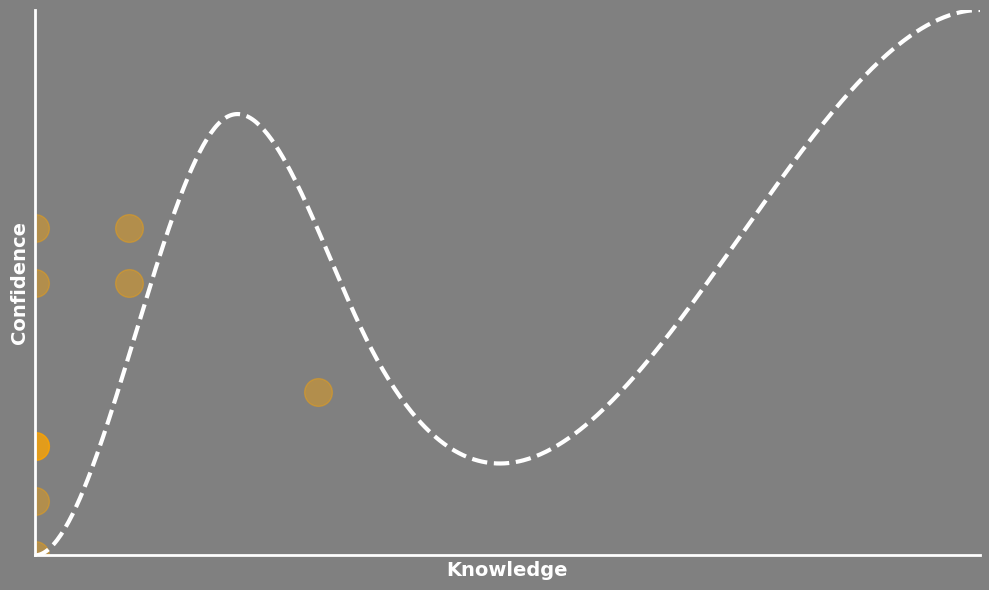

In [31]:




def plot_DK_curve(history):
    # Define the points
    x_points = np.array([0, 2, 3.5, 10])
    y_points = np.array([0, 8, 4, 10])

    # Create a cubic spline interpolation
    cspl = CubicSpline(x_points, y_points, bc_type='clamped')

    # Generate x values for the full range
    x = np.linspace(0, 10, 500)
    y = cspl(x)

    # Ensure the y values stay within the range [0, 10]

    dk_dict = {"rating": [], "confidence": []}
    for i in range(len(history)-1):
        human_msg = history[i+1]['human']
        ai_msg = json.loads(history[i]['AI'])["expected"]
        rating = get_similarity_rating(human_msg, ai_msg)
        dk_dict['rating'].append(int(rating))
        confidence = json.loads(history[i+1]['AI'])["confidence"]
        dk_dict['confidence'].append(int(confidence))

    # Plotting
    plt.figure(figsize=(10, 6),facecolor='gray')
    plt.plot(dk_dict['rating'], dk_dict['confidence'], 'o', color='orange', markersize=20, alpha=0.4)
    plt.plot(x, y, '--',color='white',linewidth=3)

    # Customizing the plot
    plt.gca().set_facecolor('gray')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('white')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().xaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_color('white')
    plt.gca().title.set_color('darkgray')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Knowledge', weight='bold')
    plt.ylabel('Confidence', weight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig('./DK_curve.png', facecolor='darkgray')

 

plot_DK_curve(history)
    

In [9]:
say yes or no if its over 5 and then coller la courbe avec perturbations

SyntaxError: expected 'else' after 'if' expression (3402448548.py, line 1)

# plotting confidence over time


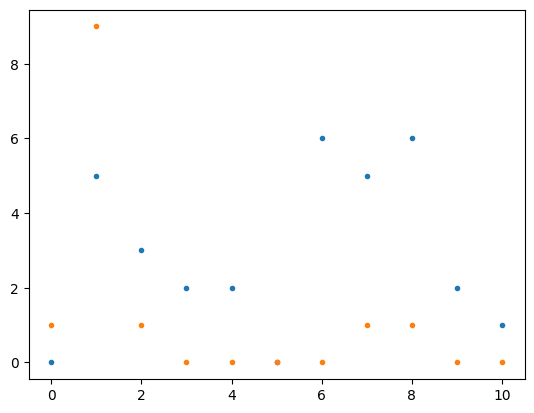

In [32]:
def retrieve_confidence(history):
    confidence = []
    for i in range(len(history)):
        confidence.append(int(json.loads(history[i]['AI'])["confidence"]))
    return confidence
plt.plot(retrieve_confidence(history),'.')

def retrieve_rating(history):
    rating = []
    for i in range(len(history)):
        rating.append(get_similarity_rating(history[i]['human'], json.loads(history[i]['AI'])["expected"]))
    return rating
plt.plot(retrieve_rating(history),'.')

# comment on style and delivery


In [36]:
# gather every deliveries that the user did and concatenate the into a single string
deliveries = []
for i in range(len(history)):
    deliveries.append(history[i]['human'])
deliveries = ' ;'.join(deliveries)

# ask the model to generate a feedback based on the deliveries

def get_similarity_rating(human_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating the quality of delivery and fiving one pointer to bring the delivery to the best delivery possible to the intented and very knowledgeable audience.
    
    EXAMPLE:
        user_input: i like innputs and girls, but i prefer blokes.
        output : Main point: your message is not clear you should refine the main message that you want to convey. 

        The output MUST be a SINGLE sentence.'''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": human_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=2*128,
    )

    return chat_completion.choices[0].message.content

get_similarity_rating(deliveries)

'Main point: Clarify your preference for "blokes" by explicitly contrasting it with your stated likes of "inputs" and "girls" for improved clarity to your knowledgeable audience.'

In [10]:
deliveries

NameError: name 'deliveries' is not defined

In [11]:
{
    "confidence": 2,
    "tone": "Unassuming",
    "feedback": "Nice to meet you, Thomas! Let's start with a simple SQL query. What is the syntax for selecting all columns and rows from a table called 'employees'?",
    "follow_up_question": "Now, Thomas, can you write a query that retrieves only the 'first_name' and 'salary' columns from the 'employees' table?",
    "expected_output": "The output should be a SELECT statement, retrieving 'first\_name' and 'salary' columns from the 'employees' table."
}["confidence"]

2